# Ejemplo Personal. Sincronización de señales usando la correlación.

In [54]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pds

# Variables globales
pi = np.pi

## Función para sincronizar dos señales

In [55]:
def sync_signals(tx: np.ndarray, rx: np.ndarray):
    # Se concatena para asegurar de que el arreglo recibido 
    # esté contenido dentro del emitido.
    tx_long = np.concatenate((tx, tx))
    # Se calcula la magnitud de la magnitud, tomando en cuenta
    # la normalización de cada señal restándole la media.
    correlation = np.abs(
        np.correlate(
            np.abs(tx_long) - np.mean(np.abs(tx_long)),
            np.abs(rx) - np.mean(np.abs(rx)),
            mode="full",
        )
    )
    
    tau = np.arange(-len(rx) + 1, len(tx_long), 1)
    
    # El retraso será entonces aquel índice donde la correlación
    # sea máxima, y teniendo en cuenta el desplazamiento
    delay = np.argmax(correlation) - len(rx) + 1

    plt.figure(figsize=(12, 6))
    plt.plot(tau, correlation, label="Correlación cruzada")
    plt.xlabel(r"Retraso ($\tau$)")
    plt.ylabel(r"R_{tx rx}")
    plt.legend(loc="upper right")
    plt.grid()
    
    # La señal sincronizada será la señal extendida desde el
    # retraso y recortada para tener la misma longitud de
    # la señal transmitida
    sync_signal = tx_long[delay:]
    sync_signal = sync_signal[: len(rx)]

    return sync_signal

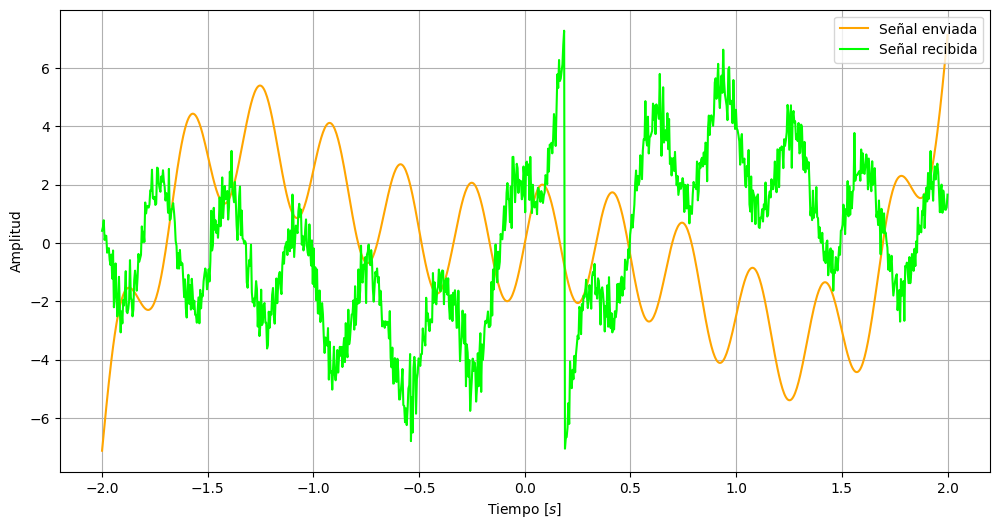

In [56]:
# Vector temporal
t = np.linspace(-2, 2, 1000)

# Función a tratar
f = lambda t: 2*np.sin(3*(2*pi)*t) - 4*np.cos((2*pi)/7*t)*np.power(t, 3)

# Señal transmitida (3 veces)
x1 = f(t)

# Señal recibida
delay = 453
x2 = np.concatenate((f(t), f(t), f(t)))[delay:delay + len(t)]

# Añadir ruido en dB
snr = 14
x2 = pds.noise(x2, snr)

# Graficar ambas señales
plt.figure(figsize=(12, 6))
plt.plot(t, x1, label="Señal enviada", color="orange")
plt.xlabel(r"Tiempo [$s$]")
plt.ylabel(r"Amplitud")
plt.legend(loc="upper right")

plt.plot(t, x2, label="Señal recibida", color="lime")
plt.xlabel(r"Tiempo [$s$]")
plt.ylabel(r"Amplitud")
plt.legend(loc="upper right")
plt.grid()

plt.show()

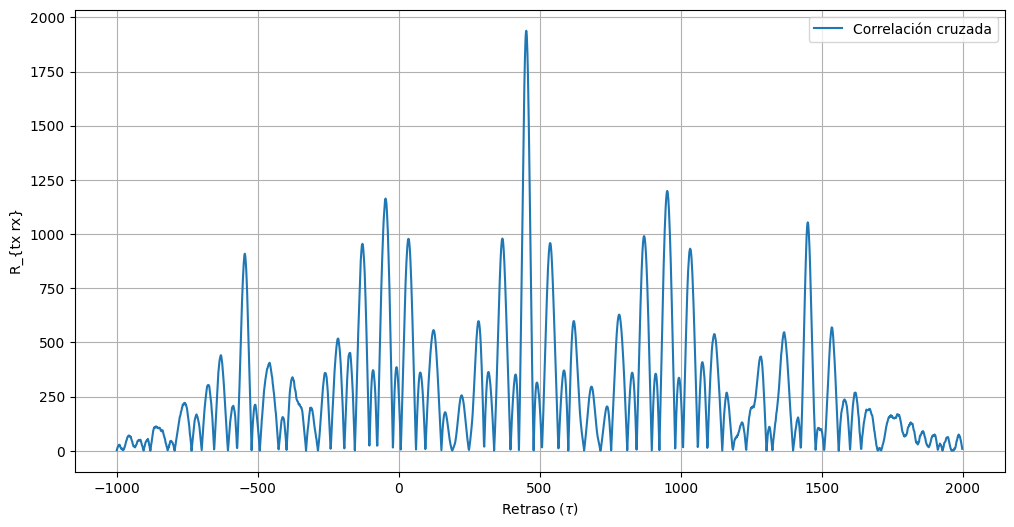

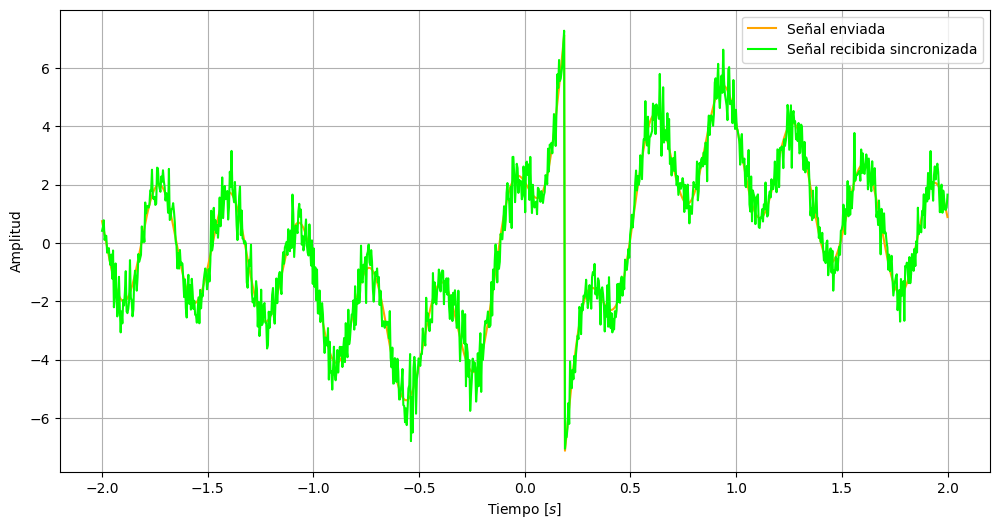

In [57]:
# Sincronizar señales
synced_x = sync_signals(x1, x2)

# Graficar ambas señales
plt.figure(figsize=(12, 6))
plt.plot(t, synced_x, label="Señal enviada", color="orange")
plt.xlabel(r"Tiempo [$s$]")
plt.ylabel(r"Amplitud")
plt.legend(loc="upper right")

plt.plot(t, x2, label="Señal recibida sincronizada", color="lime")
plt.xlabel(r"Tiempo [$s$]")
plt.ylabel(r"Amplitud")
plt.legend(loc="upper right")
plt.grid()

plt.show()